# INTRODUCTION

Comprenez le mot clustering comme regroupement en classes. Le Clustering est une technique d'apprentissage automatique non-supervisé dont l'objectif est de découvrir les groupes sous-jacents (ou "clusters") dans un ensemble de données. 

Ici on ne dispose pas de données étiquetées comme c'est le cas dans l'apprentissage automatique supervisé. L'algorithme regroupe les objets similaires en termes de leurs caractéristiques. Dans chaque groupe, on a donc des observations similaires mais les groupes sont distincts les uns des autres.

Cette technique est très utilisée dans le domaine du Marketing pour réaliser la segmentation de clientèle. La Segmentation est une pratique de partitionnement des clients en groupes d'individus ayant les mêmes caractéristiques (On utilise souvent les données démographiques des clients car elles sont plus faciles à collecter). Cette stratégie permet de comprendre le comportement des clients, sur la base de leurs données historiques, et donc d'utiliser efficacement les ressources allouées au Marketing.

Dans cette section, vous apprendrez à utiliser l'algorithme KMeans qui est le plus populaire pour les tâches de clustering.

# INITIATION A KMEANS

Le but de cette section est d'explorer l'algorithme de partitionnement automatique KMeans sur des jeux de données synthétiques 2D.
Cet exercice est inspiré en partie de cette page de la documentation scikit-learn. 30 La théorie mathématique derrière l'algorithme KMeans est décrite dans cette page31

In [310]:
import warnings

# Ignorer tous les avertissements
warnings.filterwarnings("ignore")

In [311]:
# Données synthétiques 2D
from sklearn import datasets
import numpy as np
n_samples = 500

# blob isotropes
random_data = datasets.make_blobs(n_samples=n_samples,
                                 random_state=8)

En machine learning, le terme "blob isotrope" fait référence à un type particulier de distribution de données utilisé souvent pour des tests ou des démonstrations, notamment dans des algorithmes de clustering ou de classification. Voici ce que cela signifie en détail sur chat gpt

Visualisons le jeu de données à partionner à l'aide d'un graphique de nuage de point.

In [312]:
import matplotlib.pyplot as plt

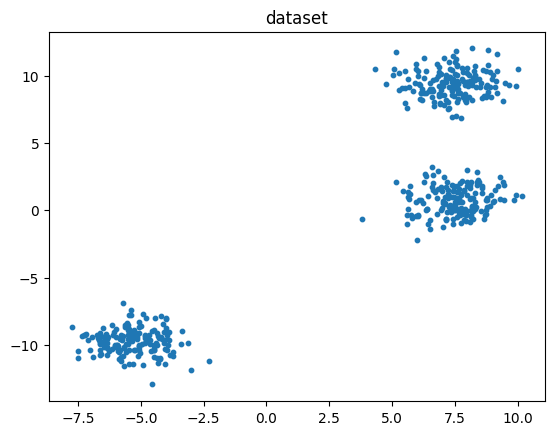

In [313]:
X, Y = random_data

plt.figure()
plt.scatter(X[:,0],
           X[:,1],
           s=10)

plt.title("dataset")
plt.show()

Supposons que random_data est un tuple contenant deux éléments : les coordonnées X et Y. 

Cette ligne décompose le tuple random_data en deux variables, X et Y. Généralement, X et Y représentent respectivement les coordonnées des points de données. Si random_data provient d'une fonction comme make_blobs, X serait un tableau NumPy avec les coordonnées des points, et Y serait un tableau contenant les labels des clusters (mais ici, on n'utilise pas Y dans le scatter plot).


Décomposition des Données :

X = random_data assigne les données générées à X. Ici, nous n'avons pas de Y séparé car nous n'utilisons que les coordonnées pour le scatter plot.


Création du Scatter Plot :
plt.scatter(X[:, 0], X[:, 1], s=10) crée un graphique de dispersion où les points sont définis par leurs coordonnées en première et deuxième dimension avec une taille de 10.


Le nuage de point ci-dessus nous suggère trois (3) groupes distincts. Appliquons alors l'algorithme Kmeans avec 3 clusters.

# EXECUTION DE KMEANS

In [314]:
# Importation du modèle Kmeans

from sklearn.cluster import KMeans

In [315]:
# Création d'un modèle Kmeans avec 3 Clusters

model = KMeans(n_clusters=3)

Le code model = KMeans(n_clusters=3) crée une instance de l'algorithme de clustering K-means avec un paramètre spécifiant le nombre de clusters à trouver dans les données. Voici une explication détaillée 

In [316]:
# Entraînement du modèle 
model.fit(X)

KMeans(n_clusters=3)

In [317]:
# Clusters (labels)
labels = model.predict(X)

In [318]:
print(labels)

[1 0 0 2 2 2 0 2 0 0 0 2 2 1 2 1 2 1 1 2 0 1 0 0 1 2 2 1 0 0 2 1 1 0 2 2 0
 1 1 0 1 0 2 0 2 2 0 1 0 0 2 0 1 0 1 0 2 0 1 0 0 2 0 1 2 1 2 2 2 2 2 0 2 0
 2 2 2 1 2 2 2 0 0 0 0 2 1 2 1 2 2 0 0 2 2 1 1 2 0 0 1 2 1 0 2 0 1 0 2 0 0
 0 2 0 2 0 1 0 0 2 0 1 2 0 2 1 0 0 1 2 2 1 2 2 2 0 1 1 0 1 0 2 1 1 1 2 0 1
 1 0 1 2 1 1 1 0 2 2 0 0 0 1 2 1 1 2 0 0 2 1 1 1 0 1 1 1 1 0 0 2 0 2 1 1 2
 0 1 2 1 2 2 2 2 2 1 1 2 2 0 0 2 0 1 1 2 2 1 0 1 1 0 1 0 0 2 0 0 1 1 0 2 1
 1 0 2 1 2 2 1 2 1 0 2 0 0 0 2 0 1 0 1 1 2 1 2 2 2 0 0 0 1 2 1 1 0 0 0 2 2
 0 2 0 2 1 1 0 0 1 1 2 0 1 1 0 0 2 1 0 0 2 2 2 2 0 1 2 1 2 0 0 1 2 0 1 0 2
 1 2 2 1 0 0 1 2 2 1 2 2 2 2 0 1 1 2 1 1 2 1 1 0 0 1 0 2 0 2 0 2 1 0 2 2 2
 0 1 2 2 0 2 1 0 1 1 0 2 1 2 0 0 1 2 2 0 2 2 2 2 0 0 2 1 0 0 2 2 0 0 1 2 2
 0 2 2 0 2 2 0 0 0 2 2 2 1 1 2 2 1 0 0 1 0 1 1 1 0 1 0 0 2 1 1 1 1 2 0 2 2
 1 0 1 2 2 0 1 1 1 0 1 2 1 1 1 0 1 0 0 2 0 0 1 1 2 1 2 2 0 1 2 2 0 2 1 1 0
 1 1 2 0 2 1 1 1 1 2 2 0 1 2 1 0 0 0 1 0 1 1 1 1 1 2 0 1 0 0 0 0 1 1 1 0 2
 0 1 1 1 1 0 0 0 1 1 2 1 

Nous pouvons mieux visualiser les clusters crées:

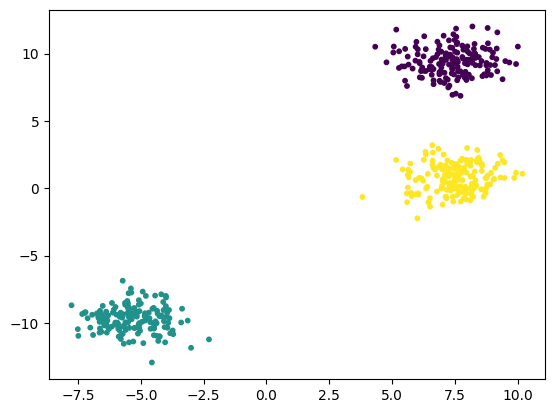

In [319]:
plt.scatter(X[:,0],
           X[:,1],
           s=10,
           c=labels)

plt.show()

La fonction scatter de la bibliothèque matplotlib.pyplot en Python est utilisée pour créer un graphique de dispersion (scatter plot). Un graphique de dispersion est un type de graphique qui utilise des coordonnées cartésiennes pour afficher des valeurs de deux variables pour un ensemble de données.

On peut aussi afficher les centoides(Centre de chaque cluster) dans le graphique:

In [320]:
# Valeurs de centroides
centroids = model.cluster_centers_

In [321]:
# Centroidedu première groupe (cluster 0 )

centroids_x = centroids[:,0]

In [322]:
centroids_x

array([ 7.38405826, -5.36091581,  7.51413324])

In [323]:
centroids_y = centroids[:, 1]

In [324]:
centroids_y

array([ 9.40230612, -9.72065583,  0.71257781])

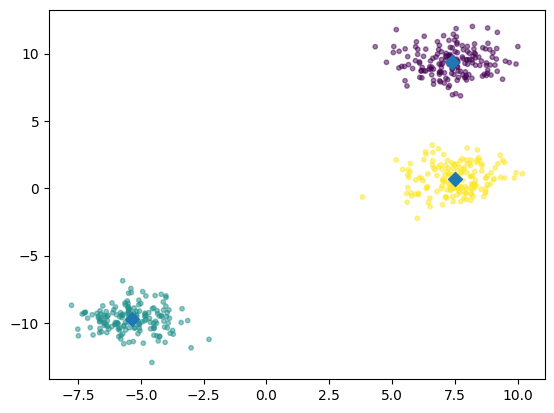

In [325]:
# Nuage de points avec les centroides
plt.scatter(X[:,0],
           X[:, 1],
           s=10,
           c=labels,
           alpha=0.5)

plt.scatter(centroids_x,
           centroids_y,
           marker= "D",
           s=50)
plt.show()

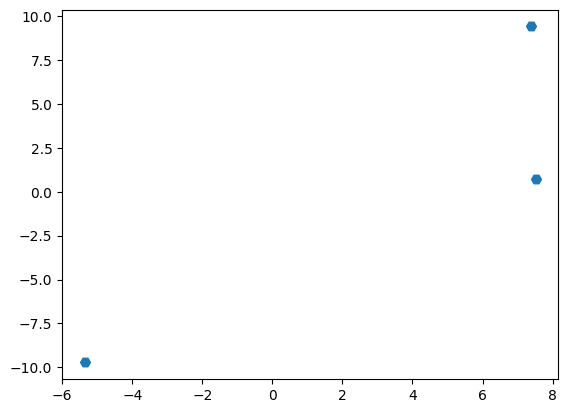

In [326]:
plt.scatter(centroids_x,
           centroids_y,
           marker= "H",
           s=50)
# H pour hexagone

Les centroïdes sont bel et bien au centre des clusters ce qui montre que la segmentation est de bonne qualité. Ceci est naturellement dû au fait que le nombre de clusters à choisir était très évident vu qu'il s'agit de données synthétiques. Dans la réalité, on est confronté à de réelles données et le nombre de clusters n'est pas toujours évident à déterminer.

Les centroides sont les représentants de chaque cluster. Si vous faites par exemple une segmentation de la clientèle de vote entreprise, vous considérerez que les caractéristiques de chaque centroide sont représentatives des caratéristiques de tous les clients du cluster de ce centroide. Puisque vous ne pouvez pas connaître personnellement chacun de vos clients, la segmentation vous donne une idée des différents groupes de clients que vous avez. Ainsi, vous pouvez adresser des campagnes marketing ciblées pour chacun de ces groupes.

# SEGMENTATION DES DONNEES D'IRIS

L'ensemble de données Iris contient 3 classes de 50 instances chacune, chaque classe se référant à un type de plante d'iris. Une classe est séparable linéairement des 2 autres ; ces denières ne sont pas linéairement séparables les unes des autres (Source : Michael Marshall (MARSHALL%PLU '@' io.arc.nasa.gov)).

In [327]:
import pandas as pd

In [328]:
iris_names = ['sepal_length', 'sepal_width', 'petal_length','petal_width' , 'class']

In [329]:
file_path = "E:/DSTI/Cours/Machine_Learning_Python_Lab/ML_Livre_JA/iris.data"

In [330]:
iris = pd.read_csv(file_path, 
                   header=None,
                  names= iris_names)

c'est quoi header=None?

Le paramètre header=None est utilisé dans la fonction read_csv de la bibliothèque pandas pour indiquer que le fichier CSV à lire n'a pas de ligne d'en-tête. Voici une explication détaillée :

In [331]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [332]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [333]:
iris.shape

(150, 5)

Supposons qu'on n'ait pas la colonne class dans l'ensemble de données et qu'on veuille les segmenter

In [334]:
# Retrait de la colonne class
df = iris.drop("class", axis=1)


In [335]:
df 

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [336]:
species = iris.pop("class")

species = iris.pop("class")
c'est quoi le pop?

La méthode pop en Python est utilisée pour supprimer un élément d'une collection et renvoyer cet élément. Lorsqu'il est appliqué à un DataFrame de pandas, pop supprime une colonne et renvoie cette colonne sous forme de Series. Voici une explication détaillée de l'utilisation de pop dans le contexte de pandas :

Utilisation de pop dans un DataFrame
La méthode pop est particulièrement utile lorsque vous souhaitez extraire une colonne d'un DataFrame pour la manipuler séparément, tout en supprimant cette colonne du DataFrame original.

In [337]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [338]:
iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Comme pour les données synthétiques, nous allons visualiser l'ensemble des données par un nuage de points afin d'essayer d'identifier le nombre de cluster.

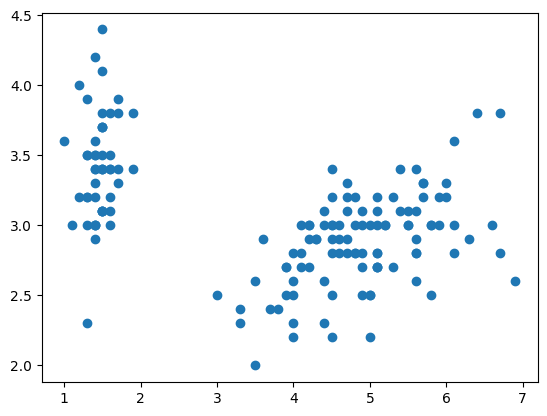

In [339]:
# Le nuage de point entre la longueur de pétales et la largeur de sepales

plt.scatter("petal_length",
           "sepal_width",
           data= iris )

plt.show()

Le nuage de point ci-dessus nous suggère 2, 3 ou 4 cluster? Contrairement aux données sythétiques précédentes, le nombre de cluster ici n'est pas évident.

In [340]:
# Mettons les données en tableaux numpy
DATA = iris[["petal_length", "sepal_width"]].values

In [341]:
print(DATA)

[[1.4 3.5]
 [1.4 3. ]
 [1.3 3.2]
 [1.5 3.1]
 [1.4 3.6]
 [1.7 3.9]
 [1.4 3.4]
 [1.5 3.4]
 [1.4 2.9]
 [1.5 3.1]
 [1.5 3.7]
 [1.6 3.4]
 [1.4 3. ]
 [1.1 3. ]
 [1.2 4. ]
 [1.5 4.4]
 [1.3 3.9]
 [1.4 3.5]
 [1.7 3.8]
 [1.5 3.8]
 [1.7 3.4]
 [1.5 3.7]
 [1.  3.6]
 [1.7 3.3]
 [1.9 3.4]
 [1.6 3. ]
 [1.6 3.4]
 [1.5 3.5]
 [1.4 3.4]
 [1.6 3.2]
 [1.6 3.1]
 [1.5 3.4]
 [1.5 4.1]
 [1.4 4.2]
 [1.5 3.1]
 [1.2 3.2]
 [1.3 3.5]
 [1.5 3.1]
 [1.3 3. ]
 [1.5 3.4]
 [1.3 3.5]
 [1.3 2.3]
 [1.3 3.2]
 [1.6 3.5]
 [1.9 3.8]
 [1.4 3. ]
 [1.6 3.8]
 [1.4 3.2]
 [1.5 3.7]
 [1.4 3.3]
 [4.7 3.2]
 [4.5 3.2]
 [4.9 3.1]
 [4.  2.3]
 [4.6 2.8]
 [4.5 2.8]
 [4.7 3.3]
 [3.3 2.4]
 [4.6 2.9]
 [3.9 2.7]
 [3.5 2. ]
 [4.2 3. ]
 [4.  2.2]
 [4.7 2.9]
 [3.6 2.9]
 [4.4 3.1]
 [4.5 3. ]
 [4.1 2.7]
 [4.5 2.2]
 [3.9 2.5]
 [4.8 3.2]
 [4.  2.8]
 [4.9 2.5]
 [4.7 2.8]
 [4.3 2.9]
 [4.4 3. ]
 [4.8 2.8]
 [5.  3. ]
 [4.5 2.9]
 [3.5 2.6]
 [3.8 2.4]
 [3.7 2.4]
 [3.9 2.7]
 [5.1 2.7]
 [4.5 3. ]
 [4.5 3.4]
 [4.7 3.1]
 [4.4 2.3]
 [4.1 3. ]
 [4.  2.5]
 [4.4 2.6]

In [430]:
# Création d'un modèle KMeans avec 2 clusters
model_iris = KMeans(n_clusters=2)

In [431]:
# Entraînement du moèdel

model_iris.fit(DATA)

KMeans(n_clusters=2)

In [432]:
# Cluster (labels)

labels_iris = model_iris.predict(DATA)

In [433]:
print(labels_iris)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


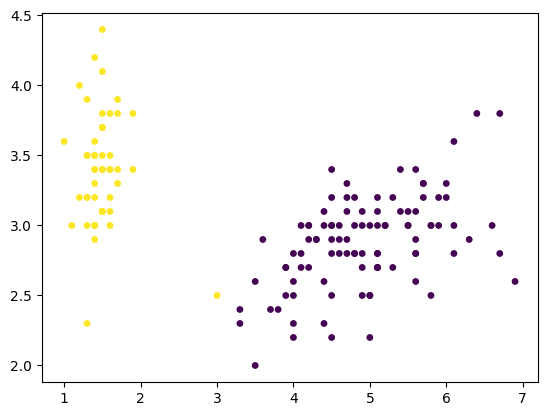

In [434]:
plt.scatter(DATA[:, 0],
           DATA[:, 1],
           s=15,
           c=labels_iris)

Contrairement aux données synthétiques, la segmentation en deux groupes des données d'iris n'est pas de très bonne qualité. Il y a deux points jaunes qui sont carrément hors de leur groupe.
Effectuons une autre segmentation avec 3 clusters.

In [435]:
# Création d'un modèle KMeans avec 3 clusters
Modul_iris = KMeans(n_clusters=3)

In [436]:
# Entraînement du modèle
Modul_iris.fit(DATA)

KMeans(n_clusters=3)

In [437]:
# Cluster label
Labels_iris = Modul_iris.predict(DATA)

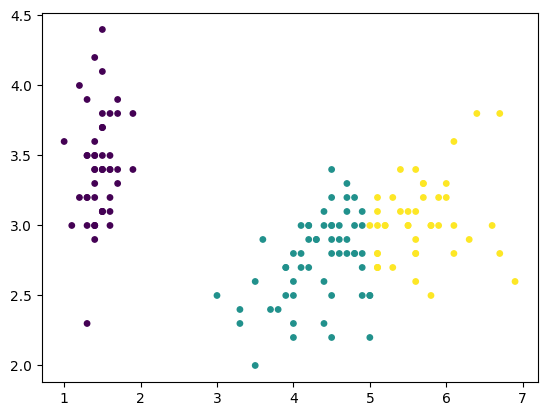

In [438]:
plt.scatter(DATA[:, 0],
           DATA[:, 1],
           s=15,
           c=Labels_iris)

plt.show()

In [439]:
# Centroides
Centroids = Modul_iris.cluster_centers_

In [440]:
Centroid_x = Centroids[:,0]

In [441]:
Centroid_y = Centroids[:,1]

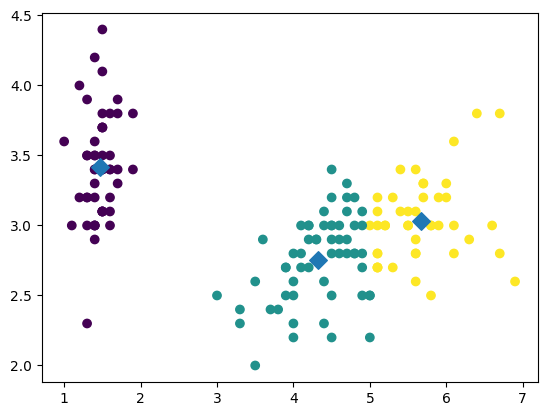

In [442]:
# Nuage de points avec les centroides
plt.scatter(DATA[:,0],
           DATA[:,1],
           c=Labels_iris)

plt.scatter(Centroid_x,
           Centroid_y,
           marker= "D",
           s=80)

plt.show()

Le résultat est meilleur avec 3 clusters bien qu'il y ait encore quelques écarts. Pourquoi on n'essayerait pas avec 4, 5, 6, ..., n clusters ?
En matière de clustering avec KMeans, le choix du nombre de clusters revient à l'utilisateur de l'algorithme. Alors :

Comment être sûr du nombre de clusters ?

Comment évaluer la qualité d'une segmentation ?

Il n'y a malheureusement pas de solution miracle quant au choix du nombre de clusters. Le choix peut être effectué en fonction de notre connaissance des données et du problème business que l'on veut résoudre. Par exemple, dans le cas des données iris, on savait qu'il y a trois types d'espèces d'où le choix d'une segmentation en trois groupes. Nous allons quand même vérifier la qualité du modèle.

In [443]:
# Création d'une dataframe avec les clusters et les espèces d' iris
df = pd.DataFrame({"Labels":Labels_iris,
                  "Species" : species})

In [444]:
df

,Labels,Species
0,0,Iris-setosa
1,0,Iris-setosa
2,0,Iris-setosa
3,0,Iris-setosa
4,0,Iris-setosa
...,...,...
145,2,Iris-virginica
146,1,Iris-virginica
147,2,Iris-virginica
148,2,Iris-virginica


In [445]:
# Tableau croisé pour compter le nombre de fois où chaque espèce coïncide avec chaque cluster (Matrice de confusion).
pd.crosstab(df["Labels"],
               df["Species"])

Species,Iris-setosa,Iris-versicolor,Iris-virginica
Labels,,,
0,50,0,0
1,0,48,9
2,0,2,41


Ce tableau croisé nous montre qu'on a effectivement une bonne segmentation des données d'iris avec k = 3. En effet, le cluster 1 correspond à 100% à l'espèce Iris-setosa. Le cluster 2 et le cluster 0 correspondent majoritairement à Iris-virginica et à Iris-versicolor respectivement.

Comment déterminer le meilleur nombre de clusters lorsqu'on a des données qui ne sont pas étiquetées ? Rappelons que l'objectif d'un algorithme d'apprentissage automatique non supervisé est de déterminer par lui-même des relations dans les données non-étiquetées. Il faut donc un moyen pour mesurer la qualité d'une segmentation et ce moyen doit utiliser uniquement les clusters et les échantillons eux-mêmes. C'est ce que nous verrons dans la section suivante.

# SEGMENTATION D'ESPECES DE POISSONS

L'ensemble des données de cette partie est un tableau d'échantillons donnant des mesures (le poids en grammes, la longueur en centimètres, le rapport en pourcentage de la hauteur à la longueur, etc.) de 7 espèces de poissons codées de 1 à 7. 

Chaque ligne représente un poisson individuel. Ces données proviennent de Journal of Statistics Education.33 Consultez la description 34 de ces données que vous pouvez télécharger via cette page. 34

In [453]:
# Définition des noms de colonnes (à adapter selon le fichier)
#columns = ["obs", "species", "weight", "length1", "length2", "length3", "height", "width"]

columns = ['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height%', 'Width%', 'Sex']
# Lecture du fichier CSV avec les paramètres corrects
fishes = pd.read_csv('http://jse.amstat.org/datasets/fishcatch.dat.txt', 
                     delimiter='\s+', 
                     header=None, 
                     names=columns)

In [454]:
fishes.head()

,Species,Weight,Length1,Length2,Length3,Height%,Width%,Sex
1,1,242.0,23.2,25.4,30.0,38.4,13.4,NaN
2,1,290.0,24.0,26.3,31.2,40.0,13.8,NaN
3,1,340.0,23.9,26.5,31.1,39.8,15.1,NaN
4,1,363.0,26.3,29.0,33.5,38.0,13.3,NaN
5,1,430.0,26.5,29.0,34.0,36.6,15.1,NaN


In [455]:
fishes.tail()

,Species,Weight,Length1,Length2,Length3,Height%,Width%,Sex
155,7,1100.0,39.0,42.0,44.6,28.7,15.4,0.0
156,7,1000.0,39.8,43.0,45.2,26.4,16.1,0.0
157,7,1100.0,40.1,43.0,45.5,27.5,16.3,0.0
158,7,1000.0,40.2,43.5,46.0,27.4,17.7,1.0
159,7,1000.0,41.1,44.0,46.6,26.8,16.3,0.0


In [456]:
fishes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 1 to 159
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    int64  
 1   Weight   158 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height%  159 non-null    float64
 6   Width%   159 non-null    float64
 7   Sex      72 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 11.2 KB


In [457]:
# Suppression de la colonne Sex qui contient beaucoup de valeurs manquantes
fishes.drop(["Sex"], 
                         axis=1,
                         inplace=True)

In [458]:
fishes

,Species,Weight,Length1,Length2,Length3,Height%,Width%
1,1,242.0,23.2,25.4,30.0,38.4,13.4
2,1,290.0,24.0,26.3,31.2,40.0,13.8
3,1,340.0,23.9,26.5,31.1,39.8,15.1
4,1,363.0,26.3,29.0,33.5,38.0,13.3
5,1,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...,...
155,7,1100.0,39.0,42.0,44.6,28.7,15.4
156,7,1000.0,39.8,43.0,45.2,26.4,16.1
157,7,1100.0,40.1,43.0,45.5,27.5,16.3
158,7,1000.0,40.2,43.5,46.0,27.4,17.7


In [464]:
# Suppression de la ligne de données manquantes dans la colonne weight
fishes.dropna(axis=0,
           inplace= True)

In [466]:
# Supposons qu'on a pas la colonne Species

Species = fishes.pop("Species")

In [469]:
# Création du tableau d'échantillons 
fishes_array = fishes.values

In [472]:
fishes_array

array([[ 242. ,   23.2,   25.4,   30. ,   38.4,   13.4],
       [ 290. ,   24. ,   26.3,   31.2,   40. ,   13.8],
       [ 340. ,   23.9,   26.5,   31.1,   39.8,   15.1],
       [ 363. ,   26.3,   29. ,   33.5,   38. ,   13.3],
       [ 430. ,   26.5,   29. ,   34. ,   36.6,   15.1],
       [ 450. ,   26.8,   29.7,   34.7,   39.2,   14.2],
       [ 500. ,   26.8,   29.7,   34.5,   41.1,   15.3],
       [ 390. ,   27.6,   30. ,   35. ,   36.2,   13.4],
       [ 450. ,   27.6,   30. ,   35.1,   39.9,   13.8],
       [ 500. ,   28.5,   30.7,   36.2,   39.3,   13.7],
       [ 475. ,   28.4,   31. ,   36.2,   39.4,   14.1],
       [ 500. ,   28.7,   31. ,   36.2,   39.7,   13.3],
       [ 500. ,   29.1,   31.5,   36.4,   37.8,   12. ],
       [ 600. ,   29.4,   32. ,   37.2,   40.2,   13.9],
       [ 600. ,   29.4,   32. ,   37.2,   41.5,   15. ],
       [ 700. ,   30.4,   33. ,   38.3,   38.8,   13.8],
       [ 700. ,   30.4,   33. ,   38.5,   38.8,   13.5],
       [ 610. ,   30.9,   33.5,

# METHODE DU COUPE (ELBOW METHOD)

Puisqu'on n'a pas une idée du nombre de cluster adéquat, on exécutera l'algorithme KMeans pour plusieurs nombres de clusters et on choisira le meilleur nombre grâce à la méthode du coude () voir la paragraphe ci-dessous